In [1]:

from biospeckle_tools_Gustavo import *
from Biospeckle_Gustavo import *


In [17]:
import scipy.io
import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

Dirs = []

for i in allfiles:
    Dir = os.path.isdir(i)

    if Dir == True:
        if str('.i') not in i and str('__') not in i:
            Dirs.append(i)

print('Carpetas disponibles')

for i in range(0,len(Dirs)):
    print(i,'-',Dirs[i])

n = int(input('Elija una carpeta ingresando su numero (int):'))

allfiles=os.listdir(Dirs[n])

files = []
Datos = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('.mat') in i:
                files.append(i)

for i in range(0,len(files)):
    print(i,'-',files[i])

for i in files:
    Direccion = Dirs[n] + '/' + i
    Datos.append(scipy.io.loadmat(Direccion)['data'])


Carpetas disponibles
0 - Hoja
1 - Nervadura
2 - Peciolo
3 - Pulvinus_primario
4 - Pulvinus_secundario
5 - Tallo
6 - Wavelet_decomposition


Elija una carpeta ingresando su numero (int): 3


0 - Pulvinus_primario_1_0.mat
1 - Pulvinus_primario_1_1.mat
2 - Pulvinus_primario_1_2.mat
3 - Pulvinus_primario_1_3.mat
4 - Pulvinus_primario_1_4.mat
5 - Pulvinus_primario_2_0.mat
6 - Pulvinus_primario_2_1.mat
7 - Pulvinus_primario_2_2.mat
8 - Pulvinus_primario_2_3.mat
9 - Pulvinus_primario_2_4.mat


In [232]:
len(Datos)


10

In [2]:
data = Datos[0]

data.shape

dt = 60/data.shape[0]

dt


0.031982942430703626

In [12]:
def Energy_kt(cw,L,Full=False):
    K,T,n,m = cw.shape
    
    NT = int(T/L)

    if Full==False:
        
        Ekt = np.zeros([K,NT,cw.shape[2],cw.shape[3]])
    
        for t in range(NT):
        
            Ekt[:,t] = (1/T)*np.sum(abs(cw[:,L*t:L*(t+1)])**2,axis=1)
    
    if Full==True:
        
        CW = cw.reshape([cw.shape[0],cw.shape[1],cw.shape[2]*cw.shape[3]])
  
        Ekt = np.zeros([K,NT])
    
        for t in range(NT):
            
            CC = abs(CW[:,L*t:L*(t+1)])**2
            
            T = CC.shape[1]*CC.shape[2]
            
            Ekt[:,t] = (1/T)*np.sum(CC.reshape(CC.shape[0],CC.shape[1]*CC.shape[2]),axis=1)
    
    return Ekt

def EnerProb(Ekt):
    
    Etotal = np.sum(Ekt,axis=0)
    
    p = Ekt/Etotal
    
    return p
    
def Entropy(p):
    
    S = -np.sum(p*np.log(p),axis=0)
    
    return S

def WTEntropy(data,L=25,Full=False):
    
    import numpy as np

    NN = 2**int(np.log2(data.shape[0]))
    
    cw,s = CWT(data[:NN],dt=dt)
    
    if Full==False:
        E = Energy_kt(cw,L)

        pkt = EnerProb(E)

        S = Entropy(pkt)
    
        Smean = np.mean(S.reshape(S.shape[0],S.shape[1]*S.shape[2]),axis=1)
        Sstd = np.std(S.reshape(S.shape[0],S.shape[1]*S.shape[2]),axis=1)
    
    if Full==True:
        E = Energy_kt(cw,L,True)

        pkt = EnerProb(E)

        S = Entropy(pkt)
        
        Smean = S
        Sstd = 0
        
    return Smean,Sstd


In [194]:
L = int(1/dt)

print(L)

SM = []
SS = []

for i in range(len(Datos)):
    
    data = Datos[i]

    dt = 60/data.shape[0]

    Sm, Ss = WTEntropy(data,L,True)

    SM.append(Sm)
    
    SS.append(Ss)


31


KeyboardInterrupt: 

In [393]:
SM = np.array(SM)
SS = np.array(SS)

Sm = np.mean(SM,axis=0)

Ss = np.std(SM,axis=0)

Ssm = np.mean(SS,axis=0)

Sss = np.std(SS,axis=0)

N = int(30/dt/L)

Sm = Sm[:N]

Ss = Ss[:N]


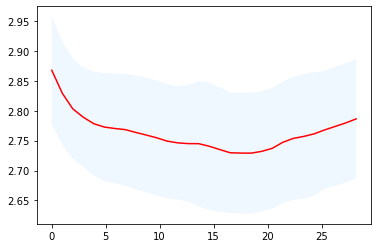

In [394]:

T = np.arange(0,L*dt*Sm.shape[0],L*dt)

plt.plot(T,Sm,'r',ms=0.5)

plt.fill_between(T, Sm-Ss, Sm+Ss, facecolor='#F0F8FF', alpha=1.0)


In [395]:
import scipy.io

name = input('Enter a name to save the file: ')

scipy.io.savemat(name+'.mat', {'mean': Sm,'std': Ss})


Enter a name to save the file:  Tallo_entropia


In [174]:
import scipy.io
import os 

allfiles = os.listdir(os.getcwd())

files = []

for i in allfiles:
    
    Dir = os.path.isdir(i)

    if Dir == False:
    
        if str('entropia.mat') in i:
        
            files.append(i)
            
SM = []
SS = []
Parte = []

for i in range(len(files)):
    
    SM.append(scipy.io.loadmat(files[i])['mean'])
    SS.append(scipy.io.loadmat(files[i])['std'])
    Parte.append(files[i].split('_')[0])
    

In [175]:
files

['Hoja_entropia.mat',
 'Nervadura_entropia.mat',
 'Peciolo_entropia.mat',
 'Pulvinusprimario_entropia.mat',
 'Pulvinussecundario_entropia.mat',
 'Tallo_entropia.mat']

In [176]:
print(Parte)

Parte = ['Limbo','Nervadura','Peciolo','Pulvino'+' '+ 'primario','Pulvino'+'z '+'secundario','Tallo']


['Hoja', 'Nervadura', 'Peciolo', 'Pulvinusprimario', 'Pulvinussecundario', 'Tallo']


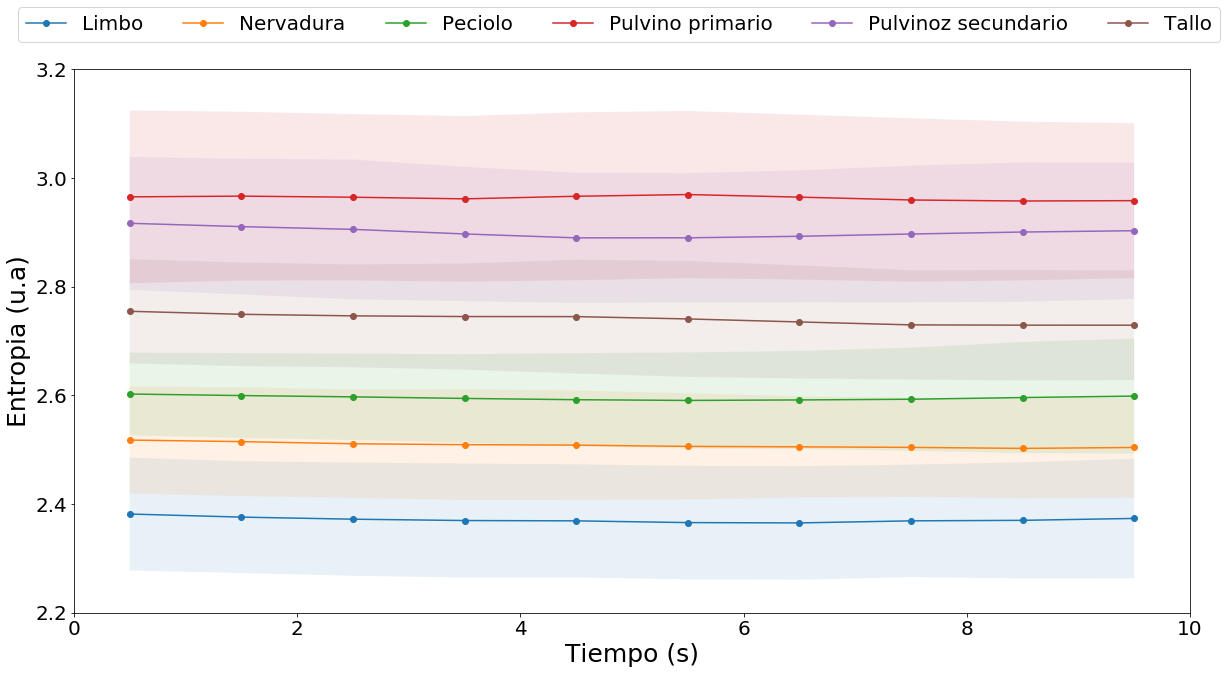

In [177]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

for i in range(len(SM)):
    
    T = np.arange(0.5,10,1)
    
    plt.plot(T,SM[i][0][10:20],'-o',label=Parte[i])
    
    plt.fill_between(T, SM[i][0][10:20]-SS[i][0][10:20], SM[i][0][10:20]+SS[i][0][10:20], alpha=0.1)
    
plt.ylim(2.2,3.2)

plt.xlim(0,10)

plt.legend(loc=(-.05,1.05),ncol=6,fontsize=20)

plt.xlabel('Tiempo (s)', fontsize=25)
plt.ylabel(r'Entropia (u.a)', fontsize=25)

plt.xticks(fontsize=20)

plt.yticks(fontsize=20)

plt.savefig('Wavelet_Entropy.png',dpi=100)


In [178]:
L = int(1/dt)

print(L)

EM = []

Freq = []

for i in range(len(Datos)):
    
    data = Datos[i]
    
    dt = 60/data.shape[0]
    
    NN = 2**int(np.log2(data.shape[0]))
    
    cw,s = CWT(data[:NN],dt=dt)
    
    w0=6
    
    freq = 1/(4 *np.pi*s/(w0 + (2 + w0 ** 2)**.5))
    
    Em = Energy_kt(cw,1,True)

    EM.append(Em)
    
    Freq.append(freq)


NameError: name 'dt' is not defined

In [331]:
EM = np.array(EM)

EMm = np.mean(EM,axis=0)


In [332]:
F = Freq[0]

In [333]:
dt = 60/data.shape[0]

In [334]:
#E = abs(cw)**2

#E = np.mean(E.reshape(E.shape[0],E.shape[1],E.shape[2]*E.shape[3]),axis=2)

En = EMm/np.sum(EMm,axis=0)

T = np.arange(0,data[0:NN].shape[0]*dt,dt)

En.shape,T.shape,s.shape


((73, 1024), (1024,), (73,))

In [335]:
import scipy.io

name = input('Enter a name to save the file: ')

scipy.io.savemat(name+'.mat', {'Energia': En, 'Escala':s,'Tiempo':T})


Enter a name to save the file:  Pulvinussecundario_energia


In [179]:
import scipy.io
import os 

allfiles = os.listdir(os.getcwd())

files = []

for i in allfiles:
    
    Dir = os.path.isdir(i)

    if Dir == False:
    
        if str('energia.mat') in i:
        
            files.append(i)
            
E = []
S = []
T = []
Parte = []

for i in range(len(files)):
    
    E.append(scipy.io.loadmat(files[i])['Energia'])
    S.append(scipy.io.loadmat(files[i])['Escala'])
    T.append(scipy.io.loadmat(files[i])['Tiempo'])
    Parte.append(files[i].split('_')[0])


In [180]:
print(Parte)

Parte = ['Limbo','Nervadura','Peciolo','Pulvino'+' '+'primario','Pulvino'+' '+'secundario','Tallo']

Parte

Na = ['(a)','(b)','(c)','(d)','(e)','(f)']

['Hoja', 'Nervadura', 'Peciolo', 'Pulvinusprimario', 'Pulvinussecundario', 'Tallo']


In [181]:

F= np.round(freq,4)

SS = s[2::5]

F = F[2::5]


NameError: name 'freq' is not defined

In [182]:
np.round(1/(4 *np.pi*15/(w0 + (2 + w0 ** 2)**.5)),3)

0.065

In [183]:
T[0].shape,S[0].shape,E[0].shape



((1, 1024), (1, 73), (73, 1024))

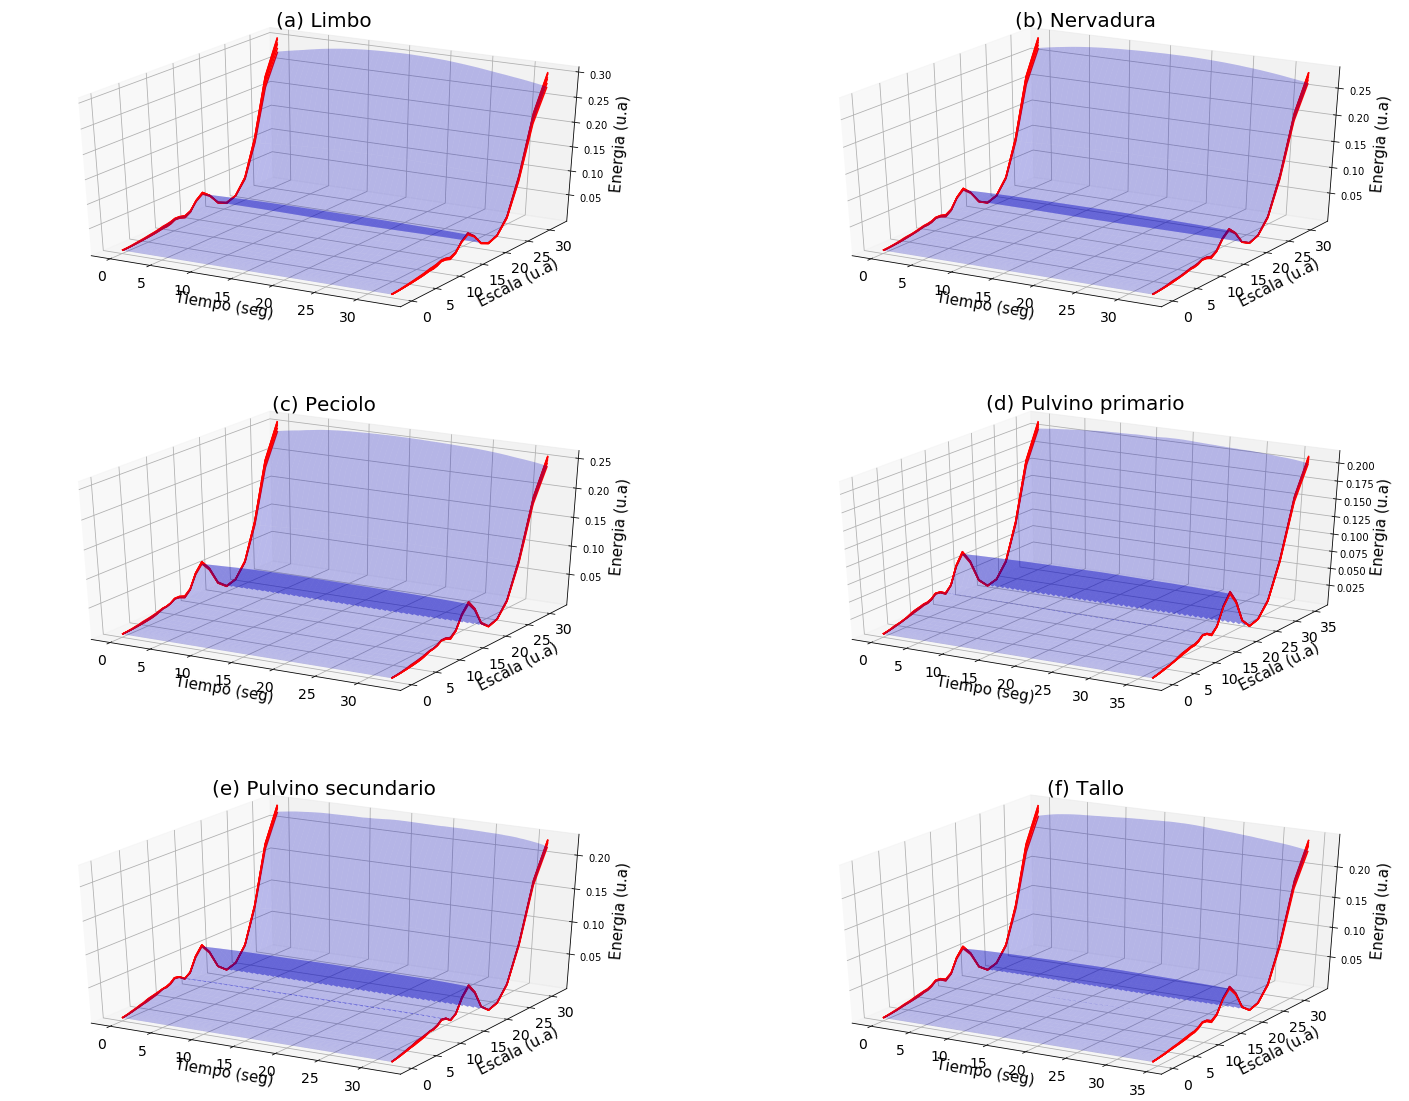

In [185]:

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(25,20))

FS1 = 15
FS2 = 20

for i in range(3):

    for j in range(2):

#        ax[i,j] = plt.axes(projection='3d')
        ax = fig.add_subplot(3, 2, 1+2*i+j, projection='3d')

        XX,YY = np.meshgrid(T[2*i+j],S[2*i+j])
        
        En = E[2*i+j]
        
        ax.plot_surface(XX, YY, En, color='blue',alpha=0.25)

        #ax.contour(XX,YY,En,linewidths=1,colors='k')

        ax.contour(XX, YY, En, zdir='x', offset=0, colors='red')
        ax.contour(XX, YY, En, zdir='x', offset= T[2*i+j][-1,-1], colors='red')

        ax.set_ylabel('Escala (u.a)',fontsize=FS1)
        ax.set_xlabel('Tiempo (seg)',fontsize=FS1)
        ax.set_zlabel('Energia (u.a)',fontsize=FS1)
        ax.set_title(Na[2*i+j]+' '+Parte[2*i+j],fontsize=FS2)
        
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

plt.savefig('Coeficientes_energia.png',dpi=200, box_inches='tight')


plt.show()


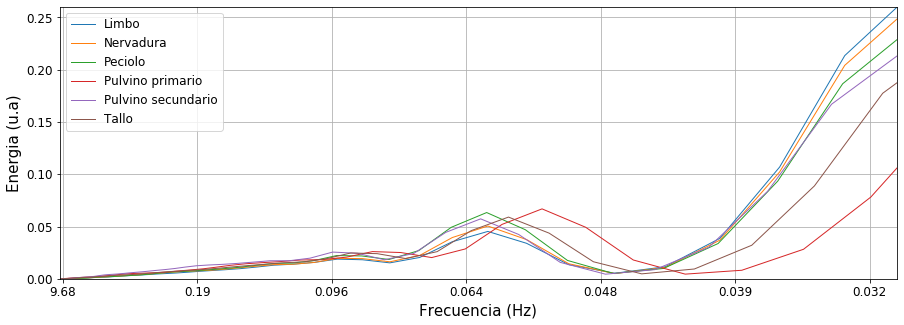

In [186]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

for i in range(len(E)):
    
    ax.plot(S[i][0],E[i][:,15],ms=4,lw=1,label=Parte[i])

ax.set_ylim(0,0.26)    
ax.set_xlim(0,31)

ESCALA = np.linspace(1e-1,30,7)
FRECUENCIA = np.round(1/(4 *np.pi*ESCALA/(w0 + (2 + w0 ** 2)**.5)),3)

#ax.invert_xaxis()

ax.set_xticks(ESCALA)
ax.set_xticklabels(FRECUENCIA)

ax.grid()
ax.set_xlabel('Frecuencia (Hz)',fontsize=15)
ax.set_ylabel('Energia (u.a)',fontsize=15)

ax.tick_params(labelsize=12)

plt.legend(fontsize=12)


plt.savefig('Coeficientes_energia_comparacion.png',dpi=200,box_inches='tight')

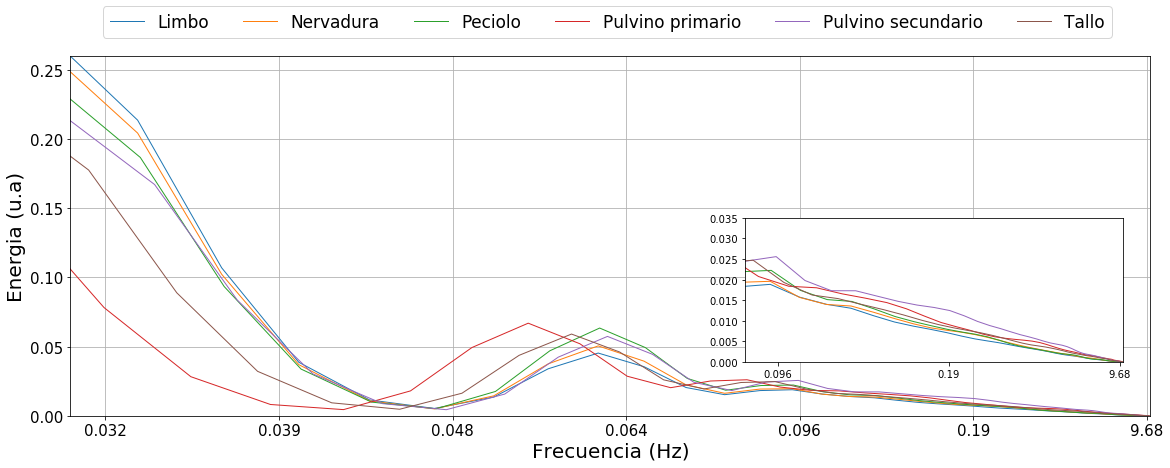

In [187]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure(figsize=(15,5))

ax = figure.add_axes([0.0, 0.0, 1, 1])
ax2 = figure.add_axes([0.625, 0.15, 0.35, 0.4]) # inset axes

for i in range(len(E)):
    
    ax.plot(S[i][0],E[i][:,15],ms=4,lw=1,label=Parte[i])
    ax2.plot(S[i][0],E[i][:,15],ms=4,lw=1,label=Parte[i])
    
w0 = 6

ESCALA = np.linspace(1e-1,30,7)
FRECUENCIA = np.round(1/(4 *np.pi*ESCALA/(w0 + (2 + w0 ** 2)**.5)),3)


ax.set_ylim(0,0.26)    
ax.set_xlim(0,31)
ax.set_xticks(ESCALA)
ax.set_xticklabels(FRECUENCIA)

ax.legend(loc=(.03,1.05),ncol=6,fontsize=17)
ax.grid()

ax.set_xlabel('Frecuencia (Hz)',fontsize=20)
ax.set_ylabel('Energia (u.a)',fontsize=20)

ax.invert_xaxis()

ESCALA2 = ESCALA[:3]
FRECUENCIA2 = FRECUENCIA[:3]

ax2.set_xlim(0,11)
ax2.set_ylim(0,0.035)

ax2.set_xticks(ESCALA2)
ax2.set_xticklabels(FRECUENCIA2)

ax2.invert_xaxis()


ax.tick_params(labelsize=15)

figure.savefig('Energia_comparacion.png',dpi=100,box_inches='tight')


In [173]:
data = Datos[0]

dt = 60/data.shape[0]

NN = 2**int(np.log2(data.shape[0]))
    
cw,s = CWT(data[:NN],dt=dt)

w0 =6

freq = 1/(4 *np.pi*s/(w0 + (2 + w0 ** 2)**.5))

DomT = np.max(freq)

Fint = 2

N = int(DomT/Fint)+1

Freqlist = []
Scallist = []

for n in range(N):

    sp = np.where((freq>=n*Fint)&(freq<(n+1)*Fint))[0]
    
    if len(sp)>0:

        Scallist.append(sp)

Scallist


NameError: name 'Datos' is not defined

In [71]:
j = -1

print(freq[Scallist[j]])

DAT = Reconstruction(cw, data[:NN], dt, 0, s[Scallist[j]],slist=Scallist[j])

#DAT = Reconstruction(cw, data[:NN], dt, 0, s)

IM = graphim(data[:NN])
IMD = graphim(DAT)
vmin = np.min(IMD)
vmax = np.max(IMD)

[29.46666667]


In [103]:
j = 14

print(freq[Scallist[j]])

DAT = Reconstruction(cw, data[:NN], dt, 0, s[Scallist[j]],slist=Scallist[j])


[29.46666667]


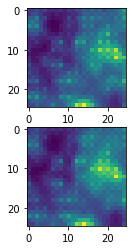

In [104]:
fig,ax = plt.subplots(2)

ax[0].imshow(graphim(DAT),vmin=vmin,vmax=vmax)

ax[1].imshow(graphim(data[:NN]))

In [481]:

CWband = np.zeros([len(Scallist),cw.shape[1]],dtype=np.complex128)

FREQlim =[]

for i in range(len(Scallist)):
    
    freqlimt=[]
    
    N = len(Scallist[i])
    
    for j in Scallist[i]:
        
        CWband[i] += CW[j]/N
    
        freqlimt.append(np.round(freq[j]))
    
    FREQlim.append(np.array(freqlimt))
    

In [489]:
T = np.arange(0,10,dt)


In [486]:
Ni = int(15/dt)
Nf = int(25/dt)

In [483]:
np.min(FREQlim[-1])

29.0

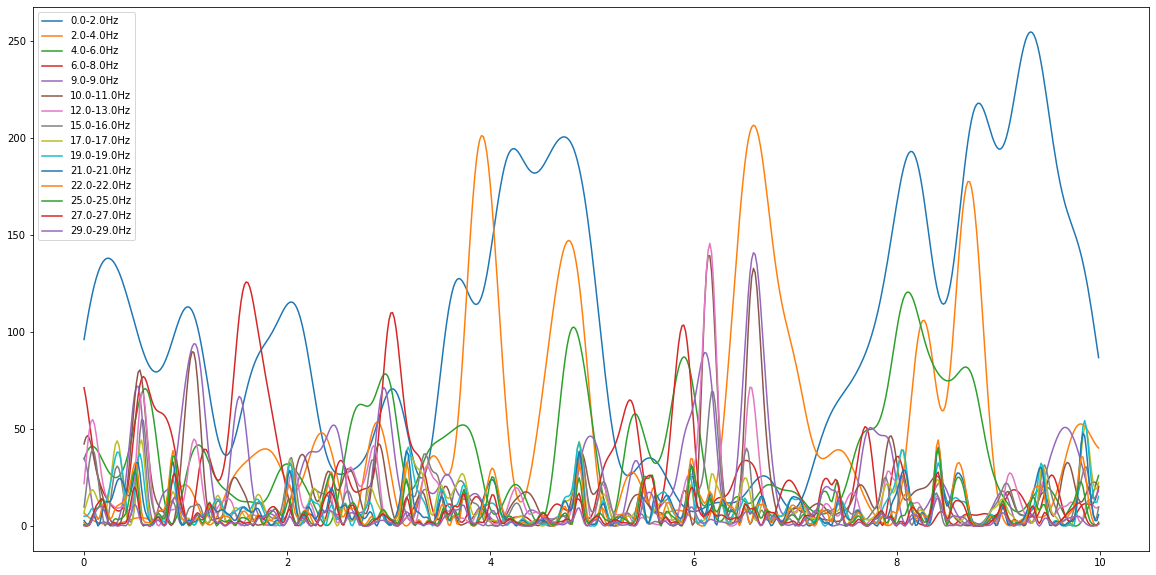

In [490]:
plt.figure(figsize=(20,10))

for i in range(len(Scallist)):
    
    plt.plot(T,(abs(CWband[i])**2)[Ni:Nf],label=str(np.min(FREQlim[i]))+'-'+str(np.max(FREQlim[i]))+'Hz')

plt.ylim()
plt.legend()

In [33]:
MHI = []

IM = []

for i in range(len(Datos)):
    
    MHI.append([np.mean(graphmhi(Datos[i])),np.std(graphmhi(Datos[i]))])
    IM.append([np.mean(graphim(Datos[i])),np.std(graphim(Datos[i]))])


In [34]:

MHI = np.round(np.array(MHI).T,0)

IM = np.round(np.array(IM).T,0)

IM.shape


(2, 10)

In [35]:
name = 'Mimosa_debilis'

parte = input('nombre parte')

import pandas as pd

data = pd.DataFrame(columns=['Muestra','Parte','n','MHI medio','MHI std','IM medio','IM std'])

for i in range(10):
    
    data.loc[i,'Muestra'] = name
    data.loc[i,'Parte'] = parte
    data.loc[i,'n'] = str(i+1)
    data.loc[i,'MHI medio'] = MHI[0,i]
    data.loc[i,'MHI std'] = MHI[1,i]
    data.loc[i,'IM medio'] = IM[0,i]
    data.loc[i,'IM std'] = IM[1,i]

data.to_csv(str(name)+'_'+str(parte)+'_Index_samples'+'.csv')



nombre parte Hoja


In [36]:
data.head()

,Muestra,Parte,n,MHI medio,MHI std,IM medio,IM std
0,Mimosa_debilis,Hoja,1,54,16,110,50
1,Mimosa_debilis,Hoja,2,53,22,114,84
2,Mimosa_debilis,Hoja,3,56,21,118,69
3,Mimosa_debilis,Hoja,4,52,18,110,54
4,Mimosa_debilis,Hoja,5,52,21,111,66


In [162]:
import pandas as pd
import glob, os

path = os.getcwd() # use your path

all_files = glob.glob(path + "/*Index_samples.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

frame.head()


,Unnamed: 0,Muestra,Parte,n,MHI medio,MHI std,IM medio,IM std
0,0,Mimosa_debilis,Hoja,1,54.0,16.0,110.0,50.0
1,1,Mimosa_debilis,Hoja,2,53.0,22.0,114.0,84.0
2,2,Mimosa_debilis,Hoja,3,56.0,21.0,118.0,69.0
3,3,Mimosa_debilis,Hoja,4,52.0,18.0,110.0,54.0
4,4,Mimosa_debilis,Hoja,5,52.0,21.0,111.0,66.0


In [163]:
DATA = frame[['Muestra','Parte','MHI medio']]

DATA['Parte'] = DATA['Parte'].str.replace('Pulvinus_secundario', 'Pulvino secundario')
DATA['Parte'] = DATA['Parte'].str.replace('Pulvinus_primario', 'Pulvino primario');
DATA['Parte'] = DATA['Parte'].str.replace('Hoja', 'Limbo');


<ipython-input-163-9be782691c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['Parte'] = DATA['Parte'].str.replace('Pulvinus_secundario', 'Pulvino secundario')
<ipython-input-163-9be782691c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['Parte'] = DATA['Parte'].str.replace('Pulvinus_primario', 'Pulvino primario');
<ipython-input-163-9be782691c80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [164]:
X = DATA.groupby(['Muestra','Parte'])

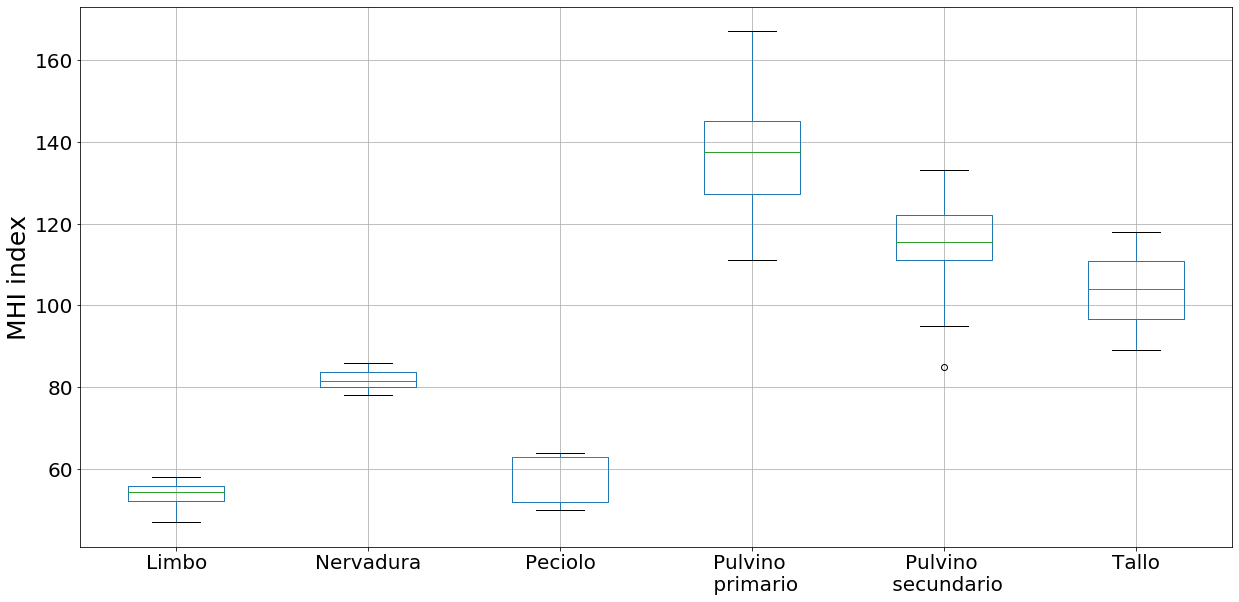

In [189]:

fig,ax = plt.subplots(1,figsize=(20,10))

boxplot = DATA.boxplot(column=['MHI medio'],by=['Parte'],ax=ax,fontsize=15)

ax.set_xlabel('',fontsize=25)

ax.set_xticklabels(['Limbo','Nervadura','Peciolo','Pulvino \n primario','Pulvino \n secundario','Tallo'])

ax.set_ylabel('MHI index',fontsize=25)

ax.set_title('')

ax.tick_params(labelsize=20)

plt.suptitle('')

plt.savefig('Box_plot_caracterizacion.png',dpi=200,box_inches='tight')



In [171]:
MHI_medio = X['MHI medio'].mean()
MHI_medio_std = X['MHI medio'].std()

MHI_medio_std

Muestra         Parte             
Mimosa_debilis  Limbo                  3.047768
                Nervadura              2.540779
                Peciolo                6.415260
                Pulvino primario      17.076299
                Pulvino secundario    14.088608
                Tallo                  9.309493
Name: MHI medio, dtype: float64

In [160]:
X.mean()


MHI medio  MHI std
Muestra        Parte                                 
Mimosa_debilis Limbo                    53.8     21.1
               Nervadura                81.7     12.0
               Peciolo                  58.4     20.0
               Pulvino primario        137.6     16.0
               Pulvino secundario      113.4     12.0
               Tallo                   104.0     20.0

In [84]:
Tis = DATA.groupby(['Parte'])

TisMEAN = Tis.mean()
TisSTD = Tis.std()


In [86]:
Sam = DATA.groupby(['Muestra','Parte'])

SamMEAN = Sam.mean()
SamSTD = Sam.std()

SamSTD.columns = ['MHImean STD', 'MHIstd STD']

In [87]:
SAAM = pd.merge(SamMEAN,SamSTD, left_index=True, right_index=True)

DATOS = pd.DataFrame(SAAM, columns = ['MHImean STD', 'MHIstd STD'])

DATOS

MHImean STD  MHIstd STD
Muestra        Parte                                       
Mimosa_debilis Hoja                    3.047768    2.766867
               Nervadura               2.540779    0.000000
               Peciolo                 6.415260    0.000000
               Pulvinus_primario      17.076299    0.000000
               Pulvinus_secundario    14.088608    0.000000
               Tallo                   9.309493    0.000000

In [134]:
print(DATOS.to_latex(index=False))

\begin{tabular}{rr}
\toprule
 MHI medio &  MHI std \\
      53.8 &     21.1 \\
\midrule
      81.7 &     12.0 \\
      58.4 &     20.0 \\
     137.6 &     16.0 \\
     113.4 &     12.0 \\
     104.0 &     20.0 \\
\bottomrule
\end{tabular}



In [4]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import ndimage
from PIL import Image

#function for lasca contrast calculation
def lasca(imarray, wsize = 7):
    immean = ndimage.uniform_filter(imarray, size=wsize)	
    im2mean = ndimage.uniform_filter(np.square(imarray), size=wsize)
    imcontrast = np.sqrt(im2mean / np.square(immean) - 1)
    return imcontrast

def Temporal_Contrast(data):
    Im = data.mean(axis=0)
    Istd = data.std(axis=0)
    
    return Istd/Im

def csd(C,Ct):
    return (2*Ct)/(C+Ct)

NN = Datos[0].shape[1]**2

Contrast = np.zeros([2,len(Datos),NN])

for i in range(len(Datos)):

    Dat = np.float64(Datos[i])
    
    Dat[Dat<=0]=0.01

    Contrast[0,i]= np.ravel(lasca(Dat[0],wsize=7))
    Contrast[1,i]= np.ravel(Temporal_Contrast(Dat[0:NN]))



In [6]:
SC = Contrast[0]
ST = Contrast[1]

ST.shape

(10, 625)

In [7]:
import pandas as pd

data = pd.DataFrame(columns=['Muestra','Parte','Parametro','n','nobs','min','max','Media','Varianza','Dst','skewness','kurtosis'])


In [ ]:
from scipy import stats

Names = ['SC','TC']

CON = [SC,ST]

Na = ['Constraste Espacial','Contraste Temporal']

name = 'Mimosa_debilis'

tissue = 'Tallo'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

n = 0

for j in range(2):
    for i in range(10):
        R = stats.describe(CON[j][i])
        print(R,str(Names[j]))
        data.loc[n,'Muestra'] = name
        data.loc[n,'Parte'] = tissue
        data.loc[n,'n'] = n #n
        data.loc[n,'nobs'] = R[0] #nobs
        data.loc[n,'Parametro'] = str(Names[j]) #parameter
        data.loc[n,'min'] = R[1][0] #min
        data.loc[n,'max'] = R[1][1] #max
        data.loc[n,'Media'] = R[2] #mean
        data.loc[n,'Varianza'] = R[3] #variance
        data.loc[n,'Dst'] = np.sqrt(R[3]) #std
        data.loc[n,'skewness'] = R[4] #skew
        data.loc[n,'kurtosis'] = R[-1] #kurto

        n += 1

        N, bins, patches = axes[j].hist(CON[j],bins=100,histtype='bar',ec='black', density=True, lw=1, alpha=0.5);
        axes[j].tick_params(axis='both', which='major', labelsize=14)
        axes[j].set_ylabel('FDP',fontsize=18)
        axes[j].set_xlabel('Contraste',fontsize=18)
        axes[j].set_title(str(Na[j]),fontsize=18)

        axes[j].set_xlim([0,1])

plt.suptitle(tissue,fontsize=30,y=1)
    
data.to_csv(str(name)+'_'+str(tissue)+'_samples'+'.csv')

plt.savefig(str(name)+'_'+str(tissue)+'_histogram'+'.pdf',bbox_inches='tight')
  
plt.show()


DescribeResult(nobs=625, minmax=(0.10222551759421117, 0.6708394071639505), mean=0.3203436750011715, variance=0.013785392494202653, skewness=0.5702803835537823, kurtosis=-0.08331323018449455) SC
DescribeResult(nobs=625, minmax=(0.10849177005109596, 0.9295458703351334), mean=0.40838660043254715, variance=0.030064477881586706, skewness=0.4817556468215779, kurtosis=-0.48022905179684017) SC


KeyboardInterrupt: 

In [49]:
data

,Muestra,Parte,Parametro,n,nobs,min,max,Media,Varianza,Dst,skewness,kurtosis
11,Mimosa_debilis,Tallo,SC,10,6250,0.0419727,0.71161,0.2584,0.0110903,0.10531,0.625473,0.349514
13,Mimosa_debilis,Tallo,TC,10,6250,0.0428674,0.662049,0.252875,0.00687209,0.0828981,0.404034,0.0808074


In [50]:
data.to_csv(str(name)+'_'+str(tissue)+'_samples'+'.csv')

In [55]:
import os 
import numpy as np
import matplotlib.pyplot as plt

allfiles = os.listdir(os.getcwd())

files = []

for i in allfiles:
        Dir = os.path.isdir(i)

        if Dir != True:
            if str('.mat') in i:
                files.append(i)
files

,Unnamed: 0,Muestra,Parte,n,MHI medio,MHI std,IM medio,IM std
0,0,Mimosa_debilis,Hoja,1,54.0,16.0,110.0,50.0
1,1,Mimosa_debilis,Hoja,2,53.0,16.0,114.0,84.0
2,2,Mimosa_debilis,Hoja,3,56.0,16.0,118.0,69.0
3,3,Mimosa_debilis,Hoja,4,52.0,16.0,110.0,54.0
4,4,Mimosa_debilis,Hoja,5,52.0,16.0,111.0,66.0


In [56]:
DATA = frame[['Sample','Tissue','Parameter','mean','std','skewness','kurtosis']]

In [57]:
X = DATA.groupby(['Muestra','Parte','Parametro'])

In [64]:
X.mean()

Media       Dst   skewness  \
Muestra        Parte               Parametro                                  
Mimosa_debilis Peciolo             SC         0.335641  0.152332   1.089677   
                                   TC         0.354851  0.096581   0.651184   
               Pulvinus primario   SC         0.252931  0.102512   0.796017   
                                   TC         0.307377  0.069755   0.185155   
               Pulvinus secundario SC         0.300696  0.201371  11.560728   
                                   TC         0.361588  0.309694  20.912630   
               Tallo               SC         0.258400  0.105310   0.625473   
                                   TC         0.252875  0.082898   0.404034   

                                                kurtosis  
Muestra        Parte               Parametro              
Mimosa_debilis Peciolo             SC           1.729722  
                                   TC           0.652906  
               Pulvinus primario   SC           0.670787  
                                   TC          -0.042871  
               Pulvinus secundario SC         272.286152  
                                   TC         568.283593  
               Tallo               SC           0.349514  
                                   TC           0.080807

In [63]:
X.std()


Media  Dst  skewness  kurtosis
Muestra        Parte               Parametro                                
Mimosa_debilis Peciolo             SC           NaN  NaN       NaN       NaN
                                   TC           NaN  NaN       NaN       NaN
               Pulvinus primario   SC           NaN  NaN       NaN       NaN
                                   TC           NaN  NaN       NaN       NaN
               Pulvinus secundario SC           NaN  NaN       NaN       NaN
                                   TC           NaN  NaN       NaN       NaN
               Tallo               SC           NaN  NaN       NaN       NaN
                                   TC           NaN  NaN       NaN       NaN

In [60]:
Tis = DATA.groupby(['Parte','Parametro'])

TisMEAN = Tis.mean()
TisSTD = Tis.std()

In [61]:
Sam = DATA.groupby(['Muestra','Parte','Parametro'])

SamMEAN = Sam.mean()
SamSTD = Sam.std()

SamSTD.columns = ['meanSTD', 'stdSTD', 'skewnessSTD', 'kurtosisSTD']

In [62]:
SAAM = pd.merge(SamMEAN,SamSTD, left_index=True, right_index=True)

DATOS = pd.DataFrame(SAAM, columns = ['mean','meanSTD','std','stdSTD','skewness','skewnessSTD','kurtosis','kurtosisSTD'])

DATOS

mean  meanSTD  std  stdSTD  \
Muestra        Parte               Parametro                               
Mimosa_debilis Peciolo             SC          NaN      NaN  NaN     NaN   
                                   TC          NaN      NaN  NaN     NaN   
               Pulvinus primario   SC          NaN      NaN  NaN     NaN   
                                   TC          NaN      NaN  NaN     NaN   
               Pulvinus secundario SC          NaN      NaN  NaN     NaN   
                                   TC          NaN      NaN  NaN     NaN   
               Tallo               SC          NaN      NaN  NaN     NaN   
                                   TC          NaN      NaN  NaN     NaN   

                                               skewness  skewnessSTD  \
Muestra        Parte               Parametro                           
Mimosa_debilis Peciolo             SC          1.089677          NaN   
                                   TC          0.651184          NaN   
               Pulvinus primario   SC          0.796017          NaN   
                                   TC          0.185155          NaN   
               Pulvinus secundario SC         11.560728          NaN   
                                   TC         20.912630          NaN   
               Tallo               SC          0.625473          NaN   
                                   TC          0.404034          NaN   

                                                kurtosis  kurtosisSTD  
Muestra        Parte               Parametro                           
Mimosa_debilis Peciolo             SC           1.729722          NaN  
                                   TC           0.652906          NaN  
               Pulvinus primario   SC           0.670787          NaN  
                                   TC          -0.042871          NaN  
               Pulvinus secundario SC         272.286152          NaN  
                                   TC         568.283593          NaN  
               Tallo               SC           0.349514          NaN  
                                   TC           0.080807          NaN

In [81]:
print(DATOS.to_latex(index=False))  

\begin{tabular}{rrrrrrrr}
\toprule
     mean &   meanSTD &       std &    stdSTD &  skewness &  skewnessSTD &  kurtosis &  kurtosisSTD \\
 0.688745 &  0.003214 &  0.188302 &  0.012139 &  0.324216 &     0.125431 &  0.490833 &     0.260306 \\
\midrule
 0.531600 &  0.010409 &  0.206220 &  0.002940 &  0.846753 &     0.046676 &  1.125366 &     0.080556 \\
 0.561243 &  0.012668 &  0.137266 &  0.009865 &  0.515129 &     0.098594 &  0.885404 &     0.373605 \\
 0.587557 &  0.012778 &  0.159888 &  0.004282 &  0.325689 &     0.060107 &  0.158640 &     0.077652 \\
 0.606303 &  0.012835 &  0.122748 &  0.006563 &  0.335087 &     0.016716 &  0.228368 &     0.084255 \\
 0.440538 &  0.020388 &  0.179947 &  0.003305 &  0.976473 &     0.103306 &  1.415163 &     0.360571 \\
 0.464677 &  0.005044 &  0.127742 &  0.004967 &  0.598379 &     0.149906 &  0.611606 &     0.216604 \\
 0.511379 &  0.011666 &  0.177032 &  0.006862 &  0.453364 &     0.035981 &  0.117947 &     0.214177 \\
 0.347873 &  0.011990 &  0.12